In [49]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

sheet_name = 'Report Data'
features = {
    'time' : '5 Minutes',
    'flow' : 'Flow (Veh/5 Minutes)',
    'speed' : 'Speed (mph)'
}
cols = [features[x] for x in features]
num_parts = 4


for i in range(0, num_parts):
    file_in = '../data/pems_output_' + str(i) + '.xlsx'
    file_out = '../data/pems_' + str(i) + '.csv'
    df = pd.read_excel(file_in, sheet_name)
    dataset = df[cols]
    dataset.to_csv(file_out, index=False)

In [50]:
for i in range(num_parts):
    df = pd.read_csv('../data/pems_' + str(i) + '.csv')
    print(df.head(1))

        5 Minutes  Speed (mph)  Flow (Veh/5 Minutes)
0  3/01/2018 0:00         68.3                    87
        5 Minutes  Speed (mph)  Flow (Veh/5 Minutes)
0  3/08/2018 0:00         68.5                   129
        5 Minutes  Speed (mph)  Flow (Veh/5 Minutes)
0  3/15/2018 0:00         68.7                    91
        5 Minutes  Speed (mph)  Flow (Veh/5 Minutes)
0  3/22/2018 0:00         68.6                    93


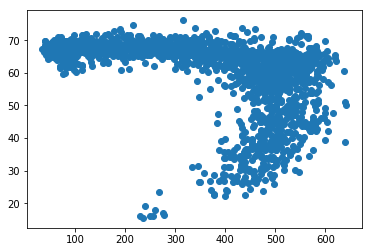

In [55]:
import matplotlib.pyplot as plt
df = pd.read_csv('../data/pems_0.csv')
plt.scatter(df[features['flow']], df[features['speed']])
plt.show()

In [60]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)


1622
406
        5 Minutes  Speed (mph)  Flow (Veh/5 Minutes)
0  3/01/2018 0:00         68.3                    87


In [76]:
# Scale the flow, keep speed the same
feature_range = (0,1)
data_min = np.min(train[features['flow']], axis=0)
data_max = np.max(train[features['flow']], axis=0)
data_range = data_max - data_min

scale_ = ((feature_range[1] - feature_range[0])/data_range)
min_ = feature_range[0]-data_min*scale_

flow_train = train[features['flow']]
flow_train *= scale_
flow_train += min_

flow_test = test[features['flow']]
flow_test *= scale_
flow_test += min_

train_list, test_list = [], []
lag = 12

for i in range(lag, len(flow_train)-1):
    xi_flow = flow_train[i-lag:i+1]
    xi_speed = train[features['speed']][i-lag:i+1]
    train_list.append((xi_flow, xi_speed))
for i in range(lag, len(flow_test)-1):
    xi_flow = flow_test[i-lag:i+1]
    xi_speed = test[features['speed']][i-lag:i+1]
    test_list.append((xi_flow, xi_speed))

train_list = np.asarray(train_list)
test_list = np.asarray(test_list)

X_train = train_list[:, :, :-1]
y_train = train_list[:, :, -1]
X_test = test_list[:, :, :-1]
y_test = test_list[:, :, -1]

scaler = (scale_, min_)

In [79]:
print(X_train.shape)
print(X_train[15])

(1609, 2, 12)
[[3.94736842e-02 5.42763158e-02 2.13815789e-02 5.75657895e-02
  4.60526316e-02 5.26315789e-02 7.07236842e-02 3.78289474e-02
  4.76973684e-02 6.57894737e-03 1.00328947e-01 6.25000000e-02]
 [6.84000000e+01 6.88000000e+01 6.86000000e+01 6.92000000e+01
  6.87000000e+01 6.85000000e+01 6.87000000e+01 6.59000000e+01
  6.66000000e+01 6.76000000e+01 6.90000000e+01 6.70000000e+01]]
